# The Team Formation Survey Report

# Introduction


In the team formation survey, we asked the responders to imagine a scenario where they were the class instructor. They were then given tasks to form teams for their class. There is software made by other students that consider skillsets and time to form the most compatible teams for any class. This survey aimed to identify the best visualization to display information (i.e., Time, Skills score) in that software. In this survey, responders were presented with different circumstances associated with corresponding graphs. The primary aim of this survey is to identify which graph yields the most accurate results in a limited time. These graphs will display different information in the software - Team Formation.

In order to formulate questions, we followed the general structure provided by the instructor (Dr. Bowen) and the student(s) who had previously worked on this project.

General Structure:
- **Basic interpretability**: We asked a simple question to test if the responder understands the graph.
- **Moving individuals**: We provided a set of graphs for two teams (i.e Team A, Team B) and asked the responder to move an individual from one team to the other team depending on the question.
- **Comparing team sets**: Here we asked the responder to explore two different scenarios (each scenario contained three different team) and provide an answer based on the question. 
- **General preference**: At the end, we asked the responder to state their preference as to which graph is the best along with their appropriate reasoning for the same.
    
We followed this general structure and based on this; we came up with different questions in order to test the responder's understanding of each graph. The graphs were created using Python. We used Qualtrics as a data collection tool and analyzed the data collected using Python. The main goal of the study is to build on and further improvise the previous study by adding better graphs and improving the questionnaires. In the analysis section, we aim to find a relationship between the time taken by responders to complete the questionnaire and the accuracy of their responses.

## The Questionnaire

Up until now, we have made use of 5 different types of graphs:

1. Stack Bar Graph
2. Group Bar Graph
3. Grid View
4. Heat Map
5. Tally

Parallel to the pervious study, we decided to use the stack bar graph and group bar graph to create teams based on student skills.

The student skills are as follow: 

- Website: how good they are at designing websites.
- Database: how good they are at writing code for databases.
- Communication: how good they are with talking to clients and customers.
- Time: how good they are with time management.

Here, the students responded to each skill on a scale from 1 - 5, where 1 indicated that they are bad at that particular skill, and 5 indicated they are highly proficient at that skill.

Additionally, Grid View, Heat Map, and Tally were used to create team based on Time availability.

## Implementing Counterbalancing

As we were creating the survey, we realized that the survey results might be biased as we were asking for visualization in a specific order (i.e., stack bar graph followed by group bar graph). Since each graph is different and has its drawbacks, we introduced counterbalancing to make our results fair and reliable. We used the Latin square technique for our survey, where we will distribute **n** numbers of the version of our survey for the **n** number of visualization. For instance, if the survey has two types of visualization, then there will be two versions. 

We organized counter balance in this order:

- Version 1: Visualization 1, Visualization 2
- Version 2: Visualization 2, Visualization 1

then these versions were assigned to different participants. For pliot study, we plan to have 2 responders for each version.

### Stack bar graph
<img src ="../visualizations/VizSkills/p13v3s/q1a.png" width="300"/>

### Group bar graph
<img src ="../visualizations/VizSkills/p13v3g/q1a.png" width="300"/>

For Section 2 - Time, as there are three graphs, there will be 3 version.

- Version 1 has Grid View first, then Heat Map and Tally in the end.
- The Version 2 has Heat Map first, then Tally and Grid View in the end.
- The Version 3 has Tally first, then Grid View and Heat Map in the end.

### Grid View
<img src ="../visualizations/section 2/Part 1/GridView/Q1_a_whole.png" width="500"/>

### Heat Map
<img src ="../visualizations/section 2/Part 1/HeatMap/Q1_a_whole.png" width="500"/>

### Tally
<img src ="../visualizations/section 2/Part 3/Tally/3a/s1_2.png" width="300"/>

It is critical to not the the conclusion made in the survey will not be accurate as we are working with a small dataset.


# Exploratory Data Analysis (EDA)

In the EDA, we will explore the data we have collected using Qualtrics.

For each section, we are going to find:

1. The average time it takes for each version of a section.
2. Find accuracy for each version and responder of a section.
3. Plot a graph to see the time taken to complete each question of every responder
4. Calculate average time per visualization
5. Calculate average accuracy per visualization

In the end of each section, we will be calculating the number of times the responders have chosen to give up on observing the graphs by selecting the response "I can't tell from graphs" instead of doing it blindly. The more frequent they decide to give up on the questions, the less confident they are with the answers. This is shown as a form of graph.

As each section is following a general structure which was mentioned in the introduction. Before no.3 is plotted, the general structure as per question will be provided.

## Section 1 - Skills

### Average time taken for each version

In [1]:
import pandas as pd
import script as sc
import numpy as np
from statistics import mean 

# Cleaning data/ preprocessing
s1v1 = pd.DataFrame(pd.read_csv('../report/data/section 1/S1V1.csv')).iloc[-2:].reset_index()
s1v1 = sc.clean_name(s1v1)
s1v2 = pd.DataFrame(pd.read_csv('../report/data/section 1/S1V2.csv')).iloc[-2:].reset_index()
s1v2 = sc.clean_name(s1v2)

gdf = sc.getAverageTime(s1v1,s1v2)

,Id,Duration (in seconds),Version
0,Responder 1,1185,1
1,Responder 2,1385,1
2,Responder 3,654,2
3,Responder 4,1171,2


,Average Duration (in seconds)
Version,
1,1285.0
2,912.5


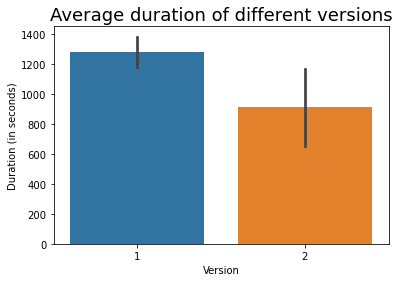

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.barplot(x="Version", y="Duration (in seconds)", data = gdf[0], estimator = np.mean)
plt.title('Average duration of different versions', fontsize=18)
plt.show()

As we can see the average time taken by version 1 is 1285.0 seconds which was 372.5 seconds more than the average time taken by version 2 (912.5 seconds).

Performing t-test on 2 versions,\
$H_0: a = b$\
$H_1: a \ne b$

In [3]:
sc.t_test(s1v1, s1v2)

0.04692794369713526

We got a p-value of **0.0469**. The p-value of this test, which is less than p = 0.05 threshold, reject the null hypothesis. Therefore, there is significant difference between both the samples.


### Accuracy for each version

In [4]:
print('Version 1')
s1v1_tpver = sc.get_correct_ans(s1v1, "../report/answer/section 1/S1V1.csv", ['Responder 1', 'Responder 2'])
print('Version 2')
s1v2_tpver = sc.get_correct_ans(s1v2, "../report/answer/section 1/S1V2.csv", ['Responder 3', 'Responder 4'])

Version 1


,Id,Num. Questions,Correct Answer,Accuracy
0,Responder 1,32,19,59.38%
1,Responder 2,32,24,75.00%


Version 2


,Id,Num. Questions,Correct Answer,Accuracy
0,Responder 3,32,20,62.50%
1,Responder 4,32,23,71.88%


The Responder 2 has the most number of correct answer.

### Graph of time taken per each question

The General Structure for this section was: 

Version 1: Group Bar Graphs were at the beginning then Stack Bar Graphs

1. Basic interpretability - Group
    - Q1-Q4 : Identify Best Team 3 teams vs 3 teams
    - Q5-Q8 : Identify Best Team 4 teams vs 3 teams
2. Moving individuals - Group
    - Q9-Q12 : Move a Student
3. Comparing team sets - Group
    - Q13-Q16 : Best Scenario
4. Basic interpretability - Stack
    - Q17-Q20 : Identify Best Team 3 teams vs 3 teams
    - Q21-Q24 : Identify Best Team 4 teams vs 3 teams
5. Moving individuals - Stack
    - Q25-Q28 : Move a Student
6. Comparing team sets - Stack
    - Q29-Q32 : Best Scenario
7. General preference
    - As there is no right answer here, we are not taking the timing of gerenal preference into account.
    


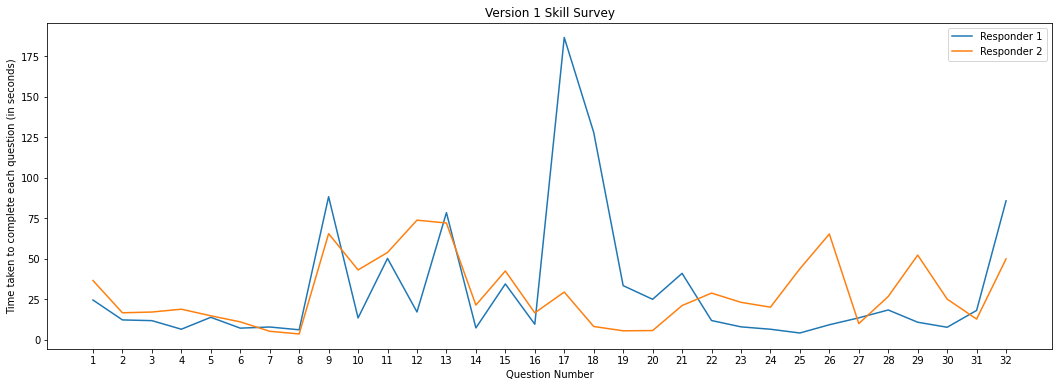

In [5]:
sc.time_display(s1v1, 'Version 1 Skill Survey', 1, 2)

As expected, less time was taken in the beginning at basic interpretability. We saw a huge spike at Q9, and the time taken is higher compared to basic interpretability. The time taken is higher till Q16 than it is highest at Q17 for responder 1. This is a kind of abnormality. Probably, responder 1 took a pause. We were present with most of responders while they were giving survey. Unfortunatly, this is one of the responder where we were not present due to some circumstances. Responder 1 was fairly quick in the rest of the question compared to responder 2. While responder 1 has abnormal timing for the stack bar graph, responder 2 had a similar trend for both graphs. Time taken was less at basic interpretability and high for moving individuals and comparing team sets.

Version 2: Stack Bar Graphs were at the beginning then Group Bar Graphs

1. Basic interpretability - Stack
    - Q1-Q4 : Identify Best Team 3 teams vs 3 teams
    - Q5-Q8 : Identify Best Team 4 teams vs 3 teams
2. Moving individuals - Stack
    - Q9-Q12 : Move a Student
3. Comparing team sets - Stack
    - Q13-Q16 : Best Scenario
4. Basic interpretability - Group
    - Q17-Q20 : Identify Best Team 3 teams vs 3 teams
    - Q21-Q24 : Identify Best Team 4 teams vs 3 teams
5. Moving individuals - Group
    - Q25-Q28 : Move a Student
6. Comparing team sets - Group
    - Q29-Q32 : Best Scenario
7. General preference
    - As there is no right answer here, we are not taking the timing of gerenal preference into account.

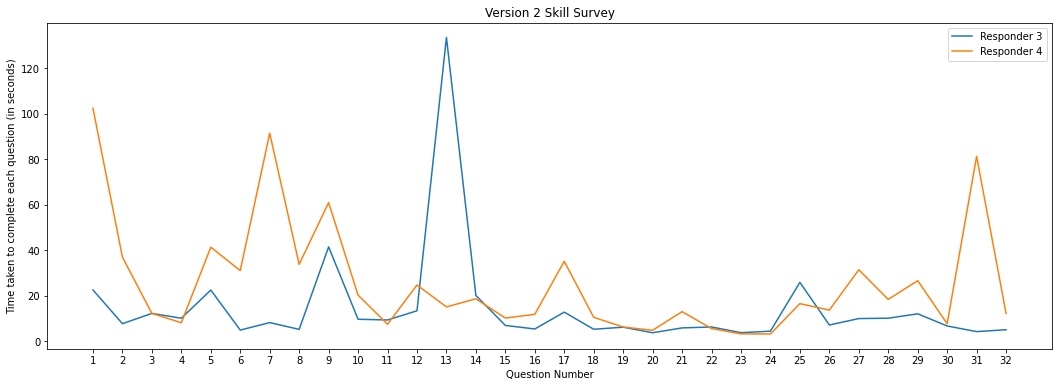

In [6]:
sc.time_display(s1v2, 'Version 2 Skill Survey', 3, 4)

Version 2 has abnormal trends to follow. A possible explanation would be that responders 3 and 4 are getting used to the survey, which explains why they were reasonably quick after Q17. Another reason can be that stacked bar graphs were overwhelming and difficult to interpret compared to the group bar graph. Again, there is an abnormality at Q13, but Q13 belongs to the compare team set section where the responder has to look at six different graphs to get a correct answer. Therefore, it might explain this considerable spike.


### Average time per visualization

In [7]:
group_time = sc.get_viz_time([s1v1,s1v2], 'grouped')
stack_time = sc.get_viz_time([s1v1,s1v2], 'stacked')
s1_tpviz = pd.DataFrame.from_dict({
    'Average time of Version 1': [round(group_time[0],2), round(stack_time[0],2)],
    'Average time of Version 2': [round(group_time[1],2),round(stack_time[1],2)],
    'Average time Per Visualization': [round(mean(group_time),2),round(mean(stack_time),2)] 
}
)
display(s1_tpviz.rename({0:'Group Bar', 1:'Stack Bar'},axis=0))

,Average time of Version 1,Average time of Version 2,Average time Per Visualization
Group Bar,25.44,19.48,22.46
Stack Bar,34.93,20.52,27.72


Stack has the higher average time taken than group. The difference is of 5.26 seconds. In average time of version 1 and version 2, we calculated average time of both the responders per visualization.

### Average accuracy per visualization

In [8]:
group_acc = sc.getVizAccuracy([s1v1,s1v2], 's1v', 'grouped', 1)
stack_acc = sc.getVizAccuracy([s1v1,s1v2], 's1v', 'stacked', 1)
s1_apviz = pd.DataFrame.from_dict({
    'Average Accuracy of Version 1': [round(group_acc[0],2), round(stack_acc[0],2), round(group_acc[0],2)+ round(stack_acc[0],2)],
    'Average Accuracy of Version 2': [round(group_acc[1],2), round(stack_acc[1],2), round(group_acc[1],2)+round(stack_acc[1],2)],
    'Average Accuracy Per Visualization': [round(mean(group_acc),2), round(mean(stack_acc),2), round(mean(group_acc),2)+round(mean(stack_acc),2)]
}
)
display(s1_apviz.rename({0:'Group Bar', 1:'Stack Bar', 2:'Total'},axis=0))

,Average Accuracy of Version 1,Average Accuracy of Version 2,Average Accuracy Per Visualization
Group Bar,34.38,39.06,36.72
Stack Bar,32.81,28.12,30.47
Total,67.19,67.18,67.19


Average accuracy of group was better than stack by 6.25. We have added Total in the row as a way to cross check if our calculation are right. As we can see that the total is 67.19 which is same as the average found in average accuracy per version.

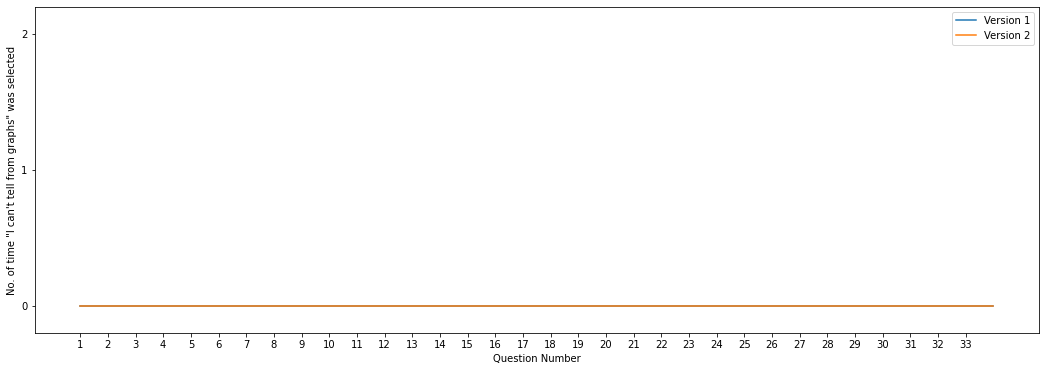

In [9]:
sc.check_confused([s1v1, s1v2])

Every responder were certain of their answer and they did not select the response "I can't tell from graphs" for any of the questions.

# Section 2 - Time

### Average time taken for each version

In [10]:
import pandas as pd

s2v1 = pd.DataFrame(pd.read_csv('../report/data/section 2/S2V1.csv'))[2:4].reset_index()
s2v1 = sc.clean_name(s2v1)
s2v2 = pd.DataFrame(pd.read_csv('../report/data/section 2/S2V2.csv'))[2:4].reset_index()
s2v2 = sc.clean_name(s2v2)
s2v3 = pd.DataFrame(pd.read_csv('../report/data/section 2/S2V3.csv'))[2:4].reset_index()
s2v3 = sc.clean_name(s2v3)

In [11]:
gdf1 = sc.getAverageTime(s2v1,s2v2,s2v3)

,Id,Duration (in seconds),Version
0,Responder 1,1126,1
1,Responder 2,854,1
2,Responder 3,739,2
3,Responder 4,1226,2
4,Responder 5,909,3
5,Responder 6,2141,3


,Average Duration (in seconds)
Version,
1,990.0
2,982.5
3,1525.0


As tally for first in the version 3, that's why responders took their time and it has higher average time.

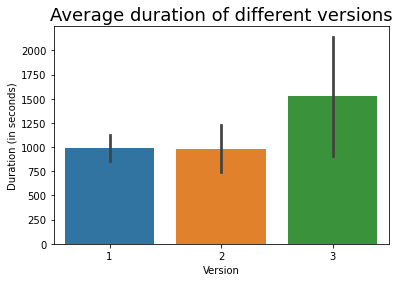

In [12]:
%matplotlib inline
sns.barplot(x="Version", y="Duration (in seconds)", data = gdf1[0], estimator = np.mean)
plt.title('Average duration of different versions', fontsize=18)
plt.show()

 Version 3 has highest average time taken at 1525.0 seconds and the difference between Version 3 and Version 2 (which was the quickest time taken to complete at 982.5 seconds) is 542.5 seconds (approx 9 mins)
 
$H_0: \mu_1 = \mu_2 = \mu_3$\
$H_1: \text{Means are not equal}$

In [13]:
sc.anova_test([s2v1, s2v2, s2v3])

0.0013327314797323987

The p-value is **0.001332**. This result is less than 0.05, which means we reject the null hypothesis $H_0$. Therefore, the mean of time taken of all 3 versions are not equal.


 ### Accuracy for each version

In [14]:
print('Version 1')
s2v1_tpver = sc.get_correct_ans(s2v1, "../report/answer/section 2/S2V1.csv", ['Responder 1', 'Responder 2'])
print('Version 2')
s2v2_tpver = sc.get_correct_ans(s2v2, "../report/answer/section 2/S2V2.csv", ['Responder 3', 'Responder 4'])
print('Version 3')
s2v3_tpver = sc.get_correct_ans(s2v3, "../report/answer/section 2/S2V3.csv", ['Responder 5', 'Responder 6'])

Version 1


,Id,Num. Questions,Correct Answer,Accuracy
0,Responder 1,54,42,77.78%
1,Responder 2,54,39,72.22%


Version 2


,Id,Num. Questions,Correct Answer,Accuracy
0,Responder 3,54,36,66.67%
1,Responder 4,54,48,88.89%


Version 3


,Id,Num. Questions,Correct Answer,Accuracy
0,Responder 5,54,42,77.78%
1,Responder 6,54,52,96.30%


The responder 6 in version 3 had the highest accuracy of 96.30% while the responder 3 from version 2 has the least average accuracy of 66.67%

### Graph of time taken per each question


Version 1: Grid View were at the beginning then Heat Map and Tally in the end.

1. Basic interpretability - Grid View
    - Q1-Q5 : Basic interpretability
    - Q6-Q9 : When can everyone meet
    - Q10-Q14 : Team Opportunities
2. Moving individuals - Grid View
    - Q15 : Move a Student
3. Comparing team sets - Grid View
    - Q16-Q18 : Best Scenario
4. Basic interpretability - Heat Map
    - Q19-Q23 : Basic interpretability
    - Q24-Q27 : When can everyone meet
    - Q28-Q32 : Team Opportunities
5. Moving individuals - Heat Map
    - Q33 : Move a Student
6. Comparing team sets - Heat Map
    - Q34-Q36 : Best Scenario
7. Basic interpretability - Tally
    - Q37-Q41 : Basic interpretability
    - Q42-Q45 : When can everyone meet
    - Q46-Q50 : Team Opportunities
8. Moving individuals - Tally
    - Q51 : Move a Student
9. Comparing team sets - Tally
    - Q52-Q54 : Best Scenario
10. General preference
    - As there is no right answer here, we are not taking the timing of gerenal preference into account.

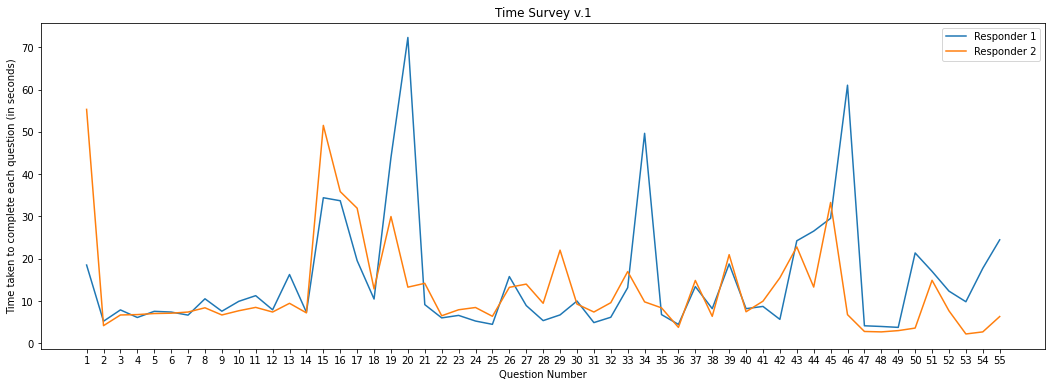

In [15]:
sc.time_display(s2v1, 'Time Survey v.1', 1, 2)

Similar to Section 1 - Skills, the basic interpretability has less time to complete as these are easy questions, to begin with, but we see the higher time taken after Q14 which is the end of basic interpretability. Tally is supposed to be diffcult to read. Few of the responders complained about tally being a frustrating graph to read. Despite tally being frustrating, for moving individuals and comparing team set Heat Map had higher time taken than Tally. For responder 1, there were spikes at Q20, Q34 and Q46 which are hard to explain. One of the possible explanations is that they are trying to understand Heat Map as Q19 and Q20 are the first heat map questions and Q34 belongs to "Comparing team sets" which tend to be diffcult than other questions. Q46 is where you have to find a team with higher opportunities to meet. Therefore, responder 1 was comparing two teams that had 15 timing options each!

Version 2: Heat Map were at the beginning then Tally and Grid View in the end.

1. Basic interpretability - Heat Map
    - Q1-Q5 : Basic interpretability
    - Q6-Q9 : When can everyone meet
    - Q10-Q14 : Team Opportunities
2. Moving individuals - Heat Map
    - Q15 : Move a Student
3. Comparing team sets - Heat Map
    - Q16-Q18 : Best Scenario
4. Basic interpretability - Tally
    - Q19-Q23 : Basic interpretability
    - Q24-Q27 : When can everyone meet
    - Q28-Q32 : Team Opportunities
5. Moving individuals - Tally
    - Q33 : Move a Student
6. Comparing team sets - Tally
    - Q34-Q36 : Best Scenario
7. Basic interpretability - Grid View
    - Q37-Q41 : Basic interpretability
    - Q42-Q45 : When can everyone meet
    - Q46-Q50 : Team Opportunities
8. Moving individuals - Grid View
    - Q51 : Move a Student
9. Comparing team sets - Grid View
    - Q52-Q54 : Best Scenario
10. General preference
    - As there is no right answer here, we are not taking the timing of gerenal preference into account.

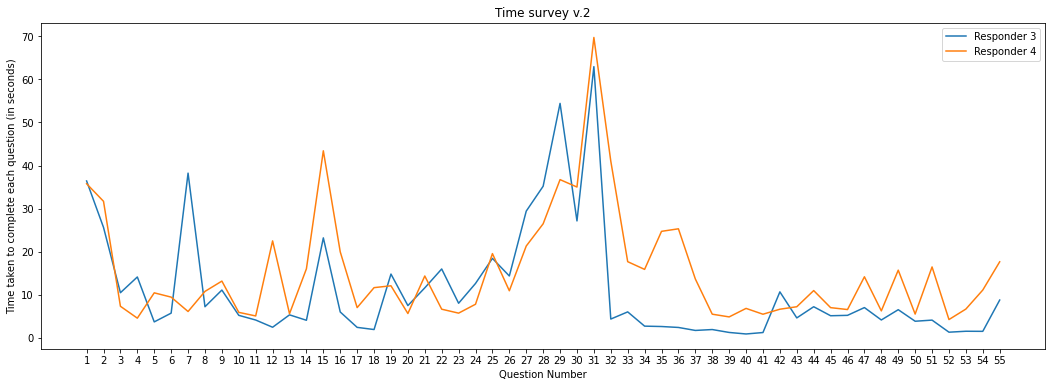

In [16]:
sc.time_display(s2v2, 'Time survey v.2', 3, 4)

Both the responders have a similar trend. We saw a huge spike at Q31 (Tally - Basic Interpretability: Team opportunity). This was expected as the tally is diffcult to read. We saw significantly less time taken in the Grid View question for both of the responders.

Version 3: Tally were at the beginning then Grid View and Heat Map in the end.

1. Basic interpretability - Tally
    - Q1-Q5 : Basic interpretability
    - Q6-Q9 : When can everyone meet
    - Q10-Q14 : Team Opportunities
2. Moving individuals - Tally
    - Q15 : Move a Student
3. Comparing team sets - Tally
    - Q16-Q18 : Best Scenario
4. Basic interpretability - Grid View
    - Q19-Q23 : Basic interpretability
    - Q24-Q27 : When can everyone meet
    - Q28-Q32 : Team Opportunities
5. Moving individuals - Grid View
    - Q33 : Move a Student
6. Comparing team sets - Grid View
    - Q34-Q36 : Best Scenario
7. Basic interpretability - Heat Map
    - Q37-Q41 : Basic interpretability
    - Q42-Q45 : When can everyone meet
    - Q46-Q50 : Team Opportunities
8. Moving individuals - Heat Map
    - Q51 : Move a Student
9. Comparing team sets - Heat Map
    - Q52-Q54 : Best Scenario
10. General preference
    - As there is no right answer here, we are not taking the timing of gerenal preference into account.

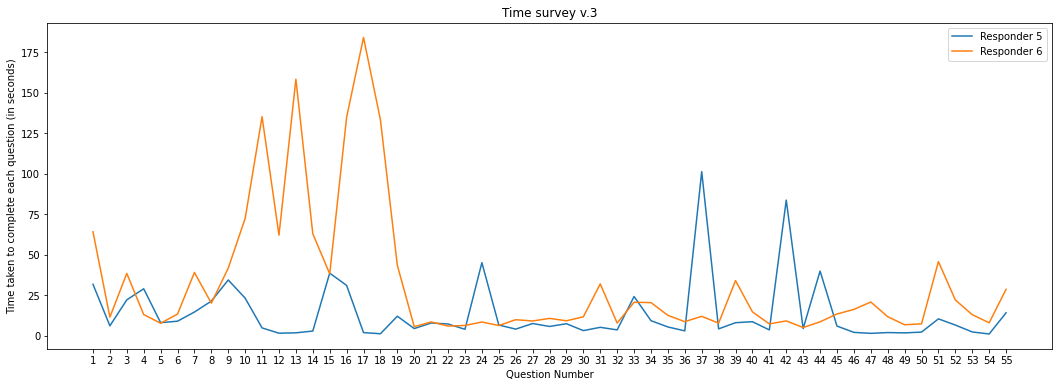

In [17]:
sc.time_display(s2v3, 'Time survey v.3', 5, 6)

Responder 6 took higher time to complete each question till Q19 but lesser time for the rest of the questions. As the tally was in the beginning this was expected. We saw huge spikes in Q37, Q42 and Q44 which are Heat Map. Except for a few questions, responder 5 was quicker than responder 6. Again, the grid view question has significantly lesser time taken than other visualization questions.

### Average time per visualization

In [18]:
gv_time = sc.get_viz_time([s2v1,s2v2,s2v3], 'gridview')
hm_time = sc.get_viz_time([s2v1,s2v2,s2v3], 'heatmap')
tally_time = sc.get_viz_time([s2v1,s2v2,s2v3], 'tally')
s2_tpviz = pd.DataFrame.from_dict({
    'Average time of Version 1': [round(gv_time[0],2), round(hm_time[0],2), round(tally_time[0],2)],
    'Average time of Version 2': [round(gv_time[1],2), round(hm_time[1],2), round(tally_time[1],2)],
    'Average time of Version 3': [round(gv_time[2],2), round(hm_time[2],2), round(tally_time[2],2)],
    'Average time Per Visualization': [round(mean(gv_time),2),round(mean(hm_time),2), round(mean(tally_time),2)] 
}
)
display(s2_tpviz.rename({0:'Grid View', 1:'Heat Map', 2: 'Tally'},axis=0))

,Average time of Version 1,Average time of Version 2,Average time of Version 3,Average time Per Visualization
Grid View,11.65,10.05,15.26,12.32
Heat Map,15.61,16.57,38.82,23.67
Tally,14.03,12.94,14.70,13.89


Grid View has the lowest time among all the other visualization. Heat Map has the highest average time.
### Average accuracy per visualization

In [19]:
gv_acc = sc.getVizAccuracy([s2v1,s2v2,s2v3], 's2v', 'gridview', 2)
hm_acc = sc.getVizAccuracy([s2v1,s2v2,s2v3], 's2v', 'heatmap', 2)
tally_acc = sc.getVizAccuracy([s2v1,s2v2,s2v3], 's2v', 'tally', 2)
s2_apviz = pd.DataFrame.from_dict({
    'Average Accuracy of Version 1': [round(gv_acc[0],2), round(hm_acc[0],2), round(tally_acc[0],2), round(gv_acc[0],2)+ round(hm_acc[0],2)+round(tally_acc[0],2)],
    'Average Accuracy of Version 2': [round(gv_acc[1],2), round(hm_acc[1],2), round(tally_acc[1],2), round(gv_acc[1],2)+ round(hm_acc[1],2)+round(tally_acc[1],2)],
    'Average Accuracy of Version 3': [round(gv_acc[2],2), round(hm_acc[2],2), round(tally_acc[2],2), round(gv_acc[2],2)+ round(hm_acc[2],2)+round(tally_acc[2],2)],
    'Average Accuracy Per Visualization': [round(mean(gv_acc),2), round(mean(hm_acc),2), round(mean(tally_acc),2), round(mean(gv_acc),2)+round(mean(hm_acc),2)+round(mean(tally_acc),2)]
}
)
display(s2_apviz.rename({0:'Grid View', 1:'Heat Map', 2:'Tally', 3:'Total'},axis=0))

,Average Accuracy of Version 1,Average Accuracy of Version 2,Average Accuracy of Version 3,Average Accuracy Per Visualization
Grid View,26.85,21.30,29.63,25.93
Heat Map,33.33,30.56,31.48,31.79
Tally,14.81,25.93,25.93,22.22
Total,74.99,77.79,87.04,79.94


Heat Map had the best accuracy out of the visualization at 31.48. In compare to Grid View, there is a difference of 6.48 % and 9.57% with Tally. Tally has the worst accuracy.

**Note:** As mentioned before, total does not contribute anything, just a way to cross check with previous readings.

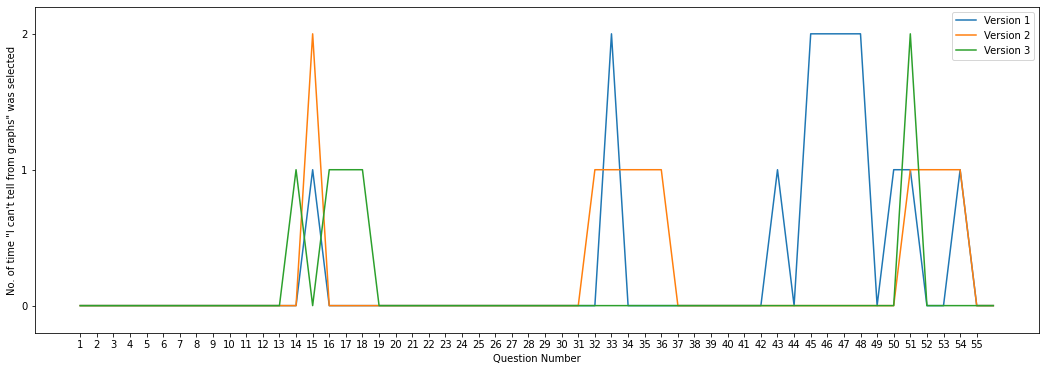

In [20]:
# add a title for this graph
sc.check_confused([s2v1, s2v2, s2v3])

There was only one question in this section where a correct answer was "I can't tell from the graphs". That was a heat map question in the moving individual part where it was diffcult to figure who to move as heat maps do not provide information about each person's selection. This question had a different question number for each version. Here is the question number as per the version.

- Version 1: Q33 
- Version 2: Q15
- Version 3: Q51

All the responders for every version were able to figure out the answer to the question above which was expected, since, the correct answer was "I can't tell from the graphs". Surprisingly, there were other questions as well where responders selected this same response. Both the responders in version 1 selected "I can't tell from the graph" responses from Q44 to Q49 which were tally graphs. The same goes for version 3, where one of the responders selected this response for Q16 to Q18 which were comparing team sets - Tally. We can even see that in version 2 from Q32 to Q36. So, this is evident that Tally is frustrating graphs!

# Analysis

In the analysis, we are simple going to take average accuracy and average time for each version of Section and compare it with the version. We will be comparing average time and average accuracy for each visulization of each section.

In [21]:
dfs1v1= pd.DataFrame(pd.read_csv('../report/data/section 1/S1V1.csv'))
dfs1v2= pd.DataFrame(pd.read_csv('../report/data/section 1/S1V2.csv'))
dfs2v1= pd.DataFrame(pd.read_csv('../report/data/section 2/S2V1.csv'))
dfs2v2= pd.DataFrame(pd.read_csv('../report/data/section 2/S2V2.csv'))
dfs2v3= pd.DataFrame(pd.read_csv('../report/data/section 2/S2V3.csv'))

analysis_s1 = pd.DataFrame.from_dict(
    {
        'Average Time Per Visualization': [
            round(mean(group_time),2),round(mean(stack_time),2)
            ],
        'Average Accuracy Per Visualization': [
            round(mean(group_acc),2), round(mean(stack_acc),2)
        ]
    }

)
analysis_s2 = pd.DataFrame.from_dict(
    {
        'Average Time Per Visualization': [
            round(mean(gv_time),2),round(mean(hm_time),2),round(mean(tally_time),2)
            ],
        'Average Accuracy Per Visualization': [
            round(mean(gv_acc),2), round(mean(hm_acc),2), round(mean(tally_acc),2)
        ]
    }

)

analysis1 = pd.DataFrame.from_dict(
    {
        'Section': ['1','1','2','2','2'],
        'Version': ['1', '2', '1', '2', '3'],
        'Average Time (in seconds)': [gdf[1]['Average Duration (in seconds)'][0], gdf[1]['Average Duration (in seconds)'][1],
        gdf1[1]['Average Duration (in seconds)'][0], gdf1[1]['Average Duration (in seconds)'][1], gdf1[1]['Average Duration (in seconds)'][2]],
        'Average Accuracy (in %)': [s1v1_tpver, s1v2_tpver, s2v1_tpver, s2v2_tpver, s2v3_tpver]
    }
)

generalPre = pd.DataFrame.from_dict({
    'Section': ['1','1', '1', '1', '2','2','2','2','2','2'],
    'Version': ['1','1','2','2','1','1','2','2','3','3'],
    'Id' : ['Responder 1', 'Responder 2', 'Responder 3', 'Responder 4', 'Responder 1','Responder 2','Responder 3','Responder 4', 'Responder 5', 'Responder 6'],
    'General Preference': [dfs1v1['Q33'][3],
    dfs1v1['Q33'][4],
    dfs1v2['Q33'][2],
    dfs1v2['Q33'][3],
    dfs2v1['Q55'][2],
    dfs2v1['Q55'][3],
    dfs2v2['Q55'][2],
    dfs2v2['Q55'][3],
    dfs2v3['Q55'][2],
    dfs2v3['Q55'][3]],
    'Explanation for General Preference': [dfs1v1['Q34'][3],
    dfs1v1['Q34'][4],
    dfs1v2['Q34'][2],
    dfs1v2['Q34'][3],
    dfs2v1['Q56'][2],
    dfs2v1['Q56'][3],
    dfs2v2['Q56'][2],
    dfs2v2['Q56'][3],
    dfs2v3['Q56'][2],
    dfs2v3['Q56'][3]]
})

pd.options.display.max_colwidth = 100
display(analysis1)
display(generalPre)

,Section,Version,Average Time (in seconds),Average Accuracy (in %)
0,1,1,1285.0,67.187500
1,1,2,912.5,67.187500
2,2,1,990.0,75.000000
3,2,2,982.5,77.777778
4,2,3,1525.0,87.037037


,Section,Version,Id,General Preference,Explanation for General Preference
0,1,1,Responder 1,Grouped Bar Graph is easier to understand,I think the grouped bar graph is more easy to understand because it there isn't a lot of calcula...
1,1,1,Responder 2,Stacked Bar Graph is easier to understand,Stacked was usually easier to interpret quickly as it clearly shows how much each student contri...
2,1,2,Responder 3,Grouped Bar Graph is easier to understand,it makes it easier to compare and understand what the values indicate
3,1,2,Responder 4,Grouped Bar Graph is easier to understand,NaN
4,2,1,Responder 1,Heat Map Graph is easier to understand,The heat map provides the most information at a glance. It's easier to deduce simple information...
5,2,1,Responder 2,Grid View Graph is easier to understand,Colour differentiation in the grid view made me aware of the situation in a jiffy. The Tally vie...
6,2,2,Responder 3,Grid View Graph is easier to understand,eyes catch colors faster and we link names/time/shit to colors better than to words/sound/name
7,2,2,Responder 4,Heat Map Graph is easier to understand,the color gradiation makes it easier to note the difference
8,2,3,Responder 5,Grid View Graph is easier to understand,"Distinct color contrast, clear time bundles, very visual and effective"
9,2,3,Responder 6,Grid View Graph is easier to understand,The grid type is better as more on the blocks more the avalability irrespective of the colour co...


In section 2, version 3 had the highest average accuracy of 87% and the highest average time taken - 1525 seconds. It is difficult to analyze as version 3 has higher due to responder 6 who had 96% accuracy which increased the overall average of version 3.

In section 1, except Responder 2, everyone preferred Group Bar Graph. In section 2, the majority of responders preferred Grid View while two responders preferred Heat Map. No one preferred tally.

In [22]:
display(analysis_s1.rename({0:'Group bar', 1:'Stack bar'}, axis=0))

,Average Time Per Visualization,Average Accuracy Per Visualization
Group bar,22.46,36.72
Stack bar,27.72,30.47


For section 1 - Skills, Group bar graph has the lowest time at 22.46 and and the highest accuracy at 36.72 %. As group bar graph is the general consensus for skills. Our finding lines up with it.

In [23]:
display(analysis_s2.rename({0:'Grid View', 1:'Heat Map', 2: 'Tally'}, axis=0))

,Average Time Per Visualization,Average Accuracy Per Visualization
Grid View,12.32,25.93
Heat Map,23.67,31.79
Tally,13.89,22.22


Grid View has the lowest time of 12.32 seconds but second best accuracy of 25.93 %. Heat Map has the highest average time of 23.57 seconds and the highest accuracy of 31.79 %. The only thing which can be derived is that heat map are time consuming but yield better accuracy.

# Conclusion

Unfortunately, as a mentioned before this dataset is small. Therefore, it is diffcult to make any conclusion.

## General Feedback and Suggested Improvement


### Section 1 V1 & V2

- Move a student Q26 for V1 and Q10 for V2 is the same graph as Q25 and Q9. (Need a fix!)
- Too many graphs!
- We can add Q1_Timer for Timer in Qualtrics. Make it easier to analyze the data

### Section 2 V1, V2 & V3

- Too many graphs!
- Why use Tally? It is the worst one!
- If there is a better way to present tally, it would be great!
- Part 3 graphs ("comparing Team Set") are diffcult to see when the responders has a smaller screen. (i.e 13 inchs)

# Future Improvement

- Add average time taken per each question. As we had small dataset, we did not add this.
- Accuracy per general structure. To see which part (i.e comparing team sets) yields better result.